# Car Prices Predictor Project

### Importing needed modules

In [448]:
import pandas as pd
import numpy as np
import tensorflow as tf
import keras
import warnings
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error 

### Reading Data

In [69]:
data = pd.read_csv("D:\Car Prices Predictor\car.csv")
warnings.filterwarnings('ignore',category=SyntaxWarning)
data.head()

,Name,Price,Color,Mileage,Make,Model,City,Date Displayed,Automatic Transmission,Air Conditioner,Power Steering,Remote Control,Item URL
0,Kia Sportage 2024,"2,800,000 EGP",Dark grey,300 Km,Kia,Sportage,Tagamo3 - New Cairo,2024-02-16,Yes,Yes,Yes,Yes,https://eg.hatla2ee.com/en/car/kia/sportage/62...
1,Chery Arrizo 5 2022,NaN,Bronze,"86,000 Km",Chery,Arrizo 5,Nasr city,2024-02-16,Yes,Yes,Yes,Yes,https://eg.hatla2ee.com/en/car/chery/Arrizo-5/...
2,Fiat Tipo 2021,"1,200,000 EGP",Petroleum,"131,000 Km",Fiat,Tipo,Kafr el-Dawwar,2024-02-16,Yes,Yes,Yes,Yes,https://eg.hatla2ee.com/en/car/fiat/tipo/6286701
3,Hyundai Tucson Turbo GDI 2021,"2,050,000 EGP",Black,"125,000 Km",Hyundai,Tucson Turbo GDI,Nasr city,2024-02-16,Yes,Yes,Yes,Yes,https://eg.hatla2ee.com/en/car/hyundai/Tucson-...
4,BMW X1 2018,"2,050,000 EGP",Gray,"84,000 Km",BMW,X1,Cairo,2024-02-16,Yes,Yes,Yes,Yes,https://eg.hatla2ee.com/en/car/bmw/x1/6254123


In [70]:
data.shape

(33559, 13)

In [71]:
data.describe()

,Name,Price,Color,Mileage,Make,Model,City,Date Displayed,Automatic Transmission,Air Conditioner,Power Steering,Remote Control,Item URL
count,33559,32625,33559,31440,33559,33559,33559,33559,33559,33559,33559,33559,33559
unique,4158,828,24,1084,101,889,103,124,2,2,2,2,22048
top,Nissan Sunny 2022,"650,000 EGP",Black,"200,000 Km",Hyundai,Sunny,Cairo,2024-02-16,Yes,Yes,Yes,Yes,https://eg.hatla2ee.com/en/car/kia/sportage/62...
freq,647,969,6532,1317,3800,1868,3983,12333,21289,20643,18450,19263,289


## Encoding Features into Numerical Classes

In [116]:
x1 = set(data['Make'])
dict2 = {}
for n,i in enumerate(x1):
    dict2[i]=n
data['car_brand_classes'] = data['Make'].map(dict2)

In [117]:
x2 = set(data['Model'])
dict1 = {}

for i,n in enumerate(x2):
    dict1[n] = i
    
data['car_model_classes'] = data['Model'].map(dict1)

In [74]:
x3 = set(data['Color'])
dict3 = {}
for n,i in enumerate(x3):
    dict3[i]=n
data['color_classes'] = data['Color'].map(dict3)

In [75]:
x4 = set(data['Automatic Transmission'])
dict4 = {'Yes':1,
          'No':0}
data['automatic_transmission_classes'] = data['Automatic Transmission'].map(dict4)

In [76]:
x5 = set(data['Air Conditioner'])
dict5 = {'Yes':1,
          'No':0}
data['air_conditioner_classes'] = data['Air Conditioner'].map(dict5)

In [77]:
x6 = set(data['Power Steering'])
dict6 = {'Yes':1,
          'No':0}
data['power_steering_classes'] = data['Power Steering'].map(dict6)

In [78]:
x7 = set(data['Remote Control'])
dict7 = {'Yes':1,
          'No':0}
data['remote_control_classes'] = data['Remote Control'].map(dict7)

In [118]:
data.head()

,Name,Price,Color,Mileage,Make,Model,City,Date Displayed,Automatic Transmission,Air Conditioner,...,car_model_classes,car_brand_classes,color_classes,automatic_transmission_classes,air_conditioner_classes,power_steering_classes,remote_control_classes,year,miles,price
0,Kia Sportage 2024,"2,800,000 EGP",Dark grey,300 Km,Kia,Sportage,Tagamo3 - New Cairo,2024-02-16,Yes,Yes,...,749,3,0,1,1,1,1,2024.0,300.0,2800000.0
1,Chery Arrizo 5 2022,NaN,Bronze,"86,000 Km",Chery,Arrizo 5,Nasr city,2024-02-16,Yes,Yes,...,189,94,13,1,1,1,1,2022.0,86000.0,NaN
2,Fiat Tipo 2021,"1,200,000 EGP",Petroleum,"131,000 Km",Fiat,Tipo,Kafr el-Dawwar,2024-02-16,Yes,Yes,...,337,28,5,1,1,1,1,2021.0,131000.0,1200000.0
3,Hyundai Tucson Turbo GDI 2021,"2,050,000 EGP",Black,"125,000 Km",Hyundai,Tucson Turbo GDI,Nasr city,2024-02-16,Yes,Yes,...,138,7,3,1,1,1,1,2021.0,125000.0,2050000.0
4,BMW X1 2018,"2,050,000 EGP",Gray,"84,000 Km",BMW,X1,Cairo,2024-02-16,Yes,Yes,...,12,17,15,1,1,1,1,2018.0,84000.0,2050000.0


# Feature Extraction

### Extract car production year from Name

In [109]:
data['Name'].isna().sum()

0

In [166]:
def extract_year(y):
    temp = y.split()
    temp = temp[len(temp)-1]
    return int(temp)

data['year'] = data['Name'].apply(extract_year)

for n,i in enumerate(data['year']) :
    if i < 1886 or i > 2025 :
        data['year'][n] = np.nan
        
print('data[year] min =',data['year'].min(),'**','data[year] max =',data['year'].max())
print('data[year] nulls sum =',data['year'].isna().sum())

data[year] min = 1963.0 ** data[year] max = 2024.0
data[year] nulls sum = 1


### Extract miles form Mileage

In [167]:
data['Mileage'].isna().sum()

2119

In [168]:
def extract_miles(x):
    if isinstance(x,str):
        x = x.split()[0]
        x = x.replace(',','')
    try :
        return int(x)
    except :
        return x
    
data['miles'] = data['Mileage'].apply(lambda x:extract_miles(x))

print('data[miles] min =',data['miles'].min(),'**','data[miles] max =',data['miles'].max())
print('data[miles] nulls sum =',data['miles'].isna().sum())

data[miles] min = 0.0 ** data[miles] max = 2226000.0
data[miles] nulls sum = 2119


### Extract Price

In [169]:
data['Price'].isna().sum()

934

In [170]:
def extract_price(x):
    if isinstance(x,str):
        x = x.split()[0]
        x = x.replace(',','')
    try :
        return int(x)
    except :
        return x
        
data['price'] = data['Price'].apply(lambda x:extract_price(x))

print('data[price] min =',data['price'].min(),'**','data[price] max =',data['price'].max())
print('data[price] nulls sum =',data['price'].isna().sum())

data[price] min = 1060.0 ** data[price] max = 20000000.0
data[price] nulls sum = 934


In [171]:
data.head()

,Name,Price,Color,Mileage,Make,Model,City,Date Displayed,Automatic Transmission,Air Conditioner,...,car_model_classes,car_brand_classes,color_classes,automatic_transmission_classes,air_conditioner_classes,power_steering_classes,remote_control_classes,year,miles,price
0,Kia Sportage 2024,"2,800,000 EGP",Dark grey,300 Km,Kia,Sportage,Tagamo3 - New Cairo,2024-02-16,Yes,Yes,...,749,3,0,1,1,1,1,2024.0,300.0,2800000.0
1,Chery Arrizo 5 2022,NaN,Bronze,"86,000 Km",Chery,Arrizo 5,Nasr city,2024-02-16,Yes,Yes,...,189,94,13,1,1,1,1,2022.0,86000.0,NaN
2,Fiat Tipo 2021,"1,200,000 EGP",Petroleum,"131,000 Km",Fiat,Tipo,Kafr el-Dawwar,2024-02-16,Yes,Yes,...,337,28,5,1,1,1,1,2021.0,131000.0,1200000.0
3,Hyundai Tucson Turbo GDI 2021,"2,050,000 EGP",Black,"125,000 Km",Hyundai,Tucson Turbo GDI,Nasr city,2024-02-16,Yes,Yes,...,138,7,3,1,1,1,1,2021.0,125000.0,2050000.0
4,BMW X1 2018,"2,050,000 EGP",Gray,"84,000 Km",BMW,X1,Cairo,2024-02-16,Yes,Yes,...,12,17,15,1,1,1,1,2018.0,84000.0,2050000.0


## Discarding unneeded features

In [351]:
clear_data = data.drop(['Name','Price','Color','Mileage','Make','Model','City','Item URL','Date Displayed',
                        'Automatic Transmission','Air Conditioner','Power Steering','Remote Control'],axis=1)
clear_data.head()

,car_model_classes,car_brand_classes,color_classes,automatic_transmission_classes,air_conditioner_classes,power_steering_classes,remote_control_classes,year,miles,price
0,749,3,0,1,1,1,1,2024.0,300.0,2800000.0
1,189,94,13,1,1,1,1,2022.0,86000.0,NaN
2,337,28,5,1,1,1,1,2021.0,131000.0,1200000.0
3,138,7,3,1,1,1,1,2021.0,125000.0,2050000.0
4,12,17,15,1,1,1,1,2018.0,84000.0,2050000.0


## Handling Nulls

In [352]:
clear_data.isna().sum()

car_model_classes                    0
car_brand_classes                    0
color_classes                        0
automatic_transmission_classes       0
air_conditioner_classes              0
power_steering_classes               0
remote_control_classes               0
year                                 1
miles                             2119
price                              934
dtype: int64

### Replace miles nulls by median

In [353]:
clear_data['miles'] = clear_data['miles'].fillna(clear_data['miles'].median())

print('clear_data[miles] nulls sum =',clear_data['miles'].isna().sum())
print('clear_data[miles] min =',clear_data['miles'].min(),'**','clear_data[miles] max =',clear_data['miles'].max())

clear_data[miles] nulls sum = 0
clear_data[miles] min = 0.0 ** clear_data[miles] max = 2226000.0


### Replace price nulls by mean

In [354]:
clear_data['price'] = clear_data['price'].fillna(clear_data['price'].mean())

print('clear_data[price] nulls sum =',clear_data['price'].isna().sum())
print('clear_data[price] min =',clear_data['price'].min(),'**','clear_data[price] max =',clear_data['miles'].max())

clear_data[price] nulls sum = 0
clear_data[price] min = 1060.0 ** clear_data[price] max = 2226000.0


In [355]:
clear_data.isna().sum()

car_model_classes                 0
car_brand_classes                 0
color_classes                     0
automatic_transmission_classes    0
air_conditioner_classes           0
power_steering_classes            0
remote_control_classes            0
year                              1
miles                             0
price                             0
dtype: int64

In [356]:
clear_data.dropna(inplace=True)
clear_data.isna().sum()

car_model_classes                 0
car_brand_classes                 0
color_classes                     0
automatic_transmission_classes    0
air_conditioner_classes           0
power_steering_classes            0
remote_control_classes            0
year                              0
miles                             0
price                             0
dtype: int64

## Handling Outliers

In [357]:
clear_data.describe()

,car_model_classes,car_brand_classes,color_classes,automatic_transmission_classes,air_conditioner_classes,power_steering_classes,remote_control_classes,year,miles,price
count,33558.000000,33558.000000,33558.000000,33558.000000,33558.000000,33558.000000,33558.000000,33558.000000,3.355800e+04,3.355800e+04
mean,445.641904,43.894749,8.824751,0.634394,0.615144,0.549794,0.574021,2014.324662,1.489314e+05,9.545115e+05
std,267.389689,30.303738,6.317735,0.481607,0.486569,0.497522,0.494498,8.323756,2.095695e+05,1.071499e+06
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1963.000000,0.000000e+00,1.060000e+03
25%,197.000000,10.000000,3.000000,0.000000,0.000000,0.000000,0.000000,2010.000000,7.300000e+04,3.950000e+05
50%,410.000000,43.000000,10.000000,1.000000,1.000000,1.000000,1.000000,2016.000000,1.260000e+05,6.700000e+05
75%,720.000000,70.000000,15.000000,1.000000,1.000000,1.000000,1.000000,2021.000000,1.800000e+05,1.050000e+06
max,888.000000,100.000000,23.000000,1.000000,1.000000,1.000000,1.000000,2024.000000,2.226000e+06,2.000000e+07


### Mlies Outliers

In [358]:
clear_data['miles'].min(), clear_data['miles'].max()

(0.0, 2226000.0)

### Detecting Miles Outliers using Z-Score

In [372]:
mean = clear_data['miles'].mean()
std = clear_data['miles'].std()
threshold = 2

outliers = []
for i in clear_data['miles']:
    z = (i-mean) / std
    if z > threshold:
        outliers.append(i)
        
print('outliers range =',min(outliers),':',max(outliers))
print('num of outlier values in miles =',len(outliers))

outliers range = 600000.0 : 2226000.0
num of outlier values in miles = 291


### Dropout Outliers

In [377]:
clear_data = clear_data[(clear_data['miles']<=600000)]
clear_data['miles'].min(), clear_data['miles'].max()

(0.0, 600000.0)

### Price Outliers

In [254]:
clear_data['price'].min(), clear_data['price'].max()

(1060.0, 20000000.0)

### Defining Prices Range Using IQR

In [397]:
q25, q75 = np.percentile(clear_data['price'], [25,75])
intr_qr = q75 - q25
min_price = q25 - (intr_qr * 0.5)
max_price = q75 + (intr_qr * 6)
print('prices range =',min_price,':',max_price)

prices range = 60000.0 : 5010000.0


In [399]:
clear_data[clear_data['price']>max_price] = np.nan
clear_data[clear_data['price']<min_price] = np.nan
print('num of outlier values in price =',clear_data['price'].isna().sum())

num of outlier values in price = 743


### Dropout Outliers

In [400]:
clear_data.dropna(inplace=True)
clear_data.isna().sum()

car_model_classes                 0
car_brand_classes                 0
color_classes                     0
automatic_transmission_classes    0
air_conditioner_classes           0
power_steering_classes            0
remote_control_classes            0
year                              0
miles                             0
price                             0
dtype: int64

In [401]:
clear_data.shape

(32235, 10)

In [402]:
clear_data.describe()

,car_model_classes,car_brand_classes,color_classes,automatic_transmission_classes,air_conditioner_classes,power_steering_classes,remote_control_classes,year,miles,price
count,32235.000000,32235.000000,32235.000000,32235.000000,32235.000000,32235.000000,32235.000000,32235.000000,32235.000000,3.223500e+04
mean,450.229006,44.472158,8.635707,0.638219,0.619358,0.551574,0.576299,2014.482798,132137.012719,8.783854e+05
std,267.780374,30.304879,6.258042,0.480523,0.485552,0.497341,0.494152,7.872328,81136.781904,7.250659e+05
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1963.000000,0.000000,6.000000e+04
25%,197.000000,13.000000,3.000000,0.000000,0.000000,0.000000,0.000000,2010.000000,75000.000000,3.950000e+05
50%,410.000000,43.000000,10.000000,1.000000,1.000000,1.000000,1.000000,2016.000000,126000.000000,6.800000e+05
75%,724.000000,70.000000,13.000000,1.000000,1.000000,1.000000,1.000000,2021.000000,180000.000000,1.050000e+06
max,888.000000,100.000000,23.000000,1.000000,1.000000,1.000000,1.000000,2024.000000,600000.000000,5.000000e+06


## Building Model

### Splitting Data

In [409]:
X = clear_data.drop(['price'], axis = 1, inplace=False)
y = clear_data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=44, shuffle = True)

In [410]:
y_train[:20]

7579     2.500000e+05
25653    1.050000e+06
33388    6.400000e+05
8193     1.100000e+06
660      3.650000e+05
17606    8.000000e+04
1469     2.400000e+05
22646    2.050000e+06
17747    5.250000e+05
6167     2.850000e+05
10629    6.500000e+05
14857    1.700000e+06
8874     6.500000e+05
11050    1.350000e+06
26385    3.000000e+06
25716    3.000000e+05
33323    4.750000e+05
33075    3.000000e+06
26406    2.050000e+06
29083    9.544847e+05
Name: price, dtype: float64

# RandomForest Regressor

In [418]:
Regressor = RandomForestRegressor(n_estimators=2100,max_depth=10, random_state=44)
Regressor.fit(X_train, y_train)

y_pred = Regressor.predict(X_test)

print(f'Train Score is : {Regressor.score(X_train, y_train)}')
print(f'Test Score is : {Regressor.score(X_test, y_test)}')

Train Score is : 0.9061465899788046
Test Score is : 0.860702802953845


## Evaluating Model

In [482]:
MdSEValue = median_absolute_error(y_test, y_pred)
print('Median Absolute Error Value is : ', MdSEValue )

MAEValue = mean_absolute_error(y_test, y_pred, multioutput='uniform_average')
print('Mean Absolute Error Value is : ', MAEValue)

MSEValue = mean_squared_error(y_test, y_pred, multioutput='uniform_average')
print('Mean Squared Error Value is : ', MSEValue)

Median Absolute Error Value is :  56570.390310971066
Mean Absolute Error Value is :  133346.43284368623
Mean Squared Error Value is :  72463747981.59692


## Scatter Graph

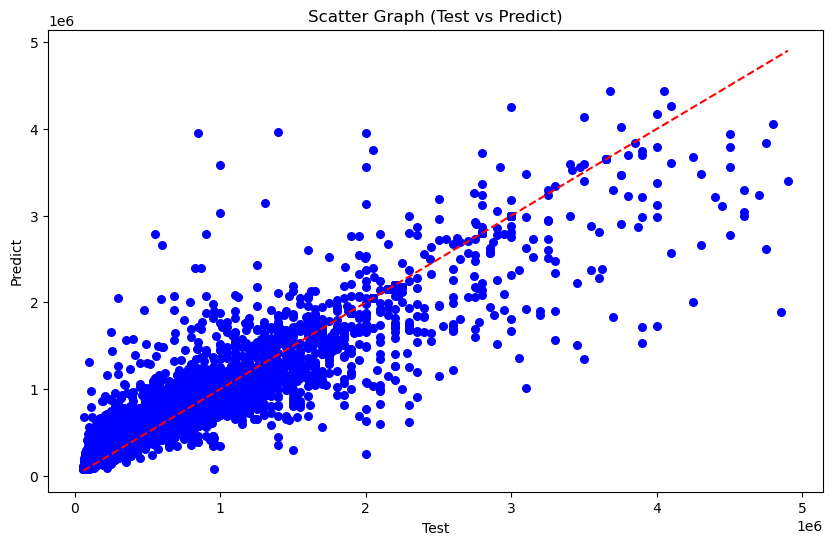

In [480]:
plt.figure(figsize = (10, 6))

plt.scatter(y_test,y_pred,s=30,alpha=1,color= 'b')
plt.title('Scatter Graph (Test vs Predict)')
plt.xlabel('Test')
plt.ylabel('Predict')


min_val = min(min(y_test), min(y_pred))

max_val = max(max(y_test),max(y_pred))

plt.plot([min_val, max_val], [min_val, max_val], 'r--')

plt.show()

## Colors Bar Chart

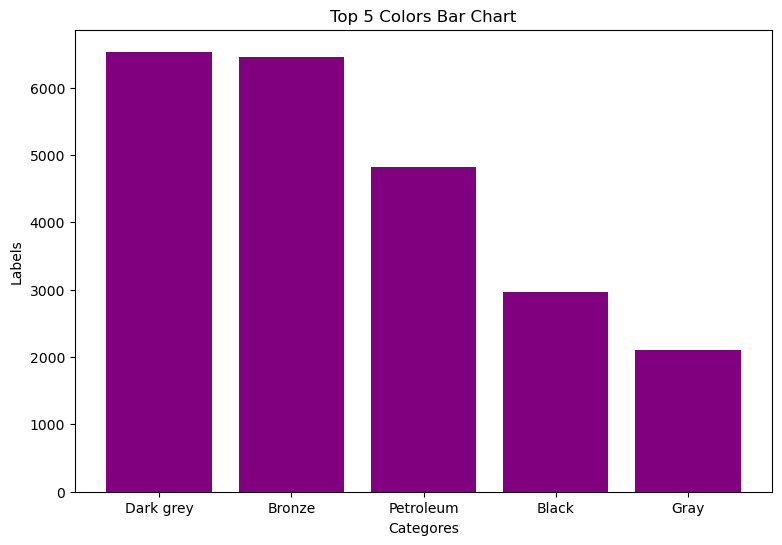

In [503]:
count = data['Color'].value_counts()
plt.figure(figsize=(9,6))
plt.bar(data['Color'].head(5), count.head(5), color="purple")
plt.xlabel("Categores")
plt.ylabel("Labels")
plt.title("Top 5 Colors Bar Chart")
plt.show()

## Visualize Correlation Using Heatmap

In [481]:
correlation = clear_data.corr()
correlation

,car_model_classes,car_brand_classes,color_classes,automatic_transmission_classes,air_conditioner_classes,power_steering_classes,remote_control_classes,year,miles,price
car_model_classes,1.000000,-0.108680,0.014391,0.075754,-0.028151,-0.009314,-0.041514,0.011364,0.010739,0.017765
car_brand_classes,-0.108680,1.000000,-0.017242,0.043094,-0.010178,0.008637,0.003579,0.097174,-0.038741,0.030320
color_classes,0.014391,-0.017242,1.000000,-0.041765,-0.023634,-0.086428,-0.063287,-0.079345,-0.017909,-0.173245
automatic_transmission_classes,0.075754,0.043094,-0.041765,1.000000,0.559109,0.532162,0.543218,0.421142,-0.271958,0.357643
air_conditioner_classes,-0.028151,-0.010178,-0.023634,0.559109,1.000000,0.794424,0.824941,0.400536,-0.318444,0.289201
power_steering_classes,-0.009314,0.008637,-0.086428,0.532162,0.794424,1.000000,0.787490,0.448647,-0.349980,0.335829
remote_control_classes,-0.041514,0.003579,-0.063287,0.543218,0.824941,0.787490,1.000000,0.411638,-0.303837,0.336606
year,0.011364,0.097174,-0.079345,0.421142,0.400536,0.448647,0.411638,1.000000,-0.545105,0.514904
miles,0.010739,-0.038741,-0.017909,-0.271958,-0.318444,-0.349980,-0.303837,-0.545105,1.000000,-0.411830
price,0.017765,0.030320,-0.173245,0.357643,0.289201,0.335829,0.336606,0.514904,-0.411830,1.000000


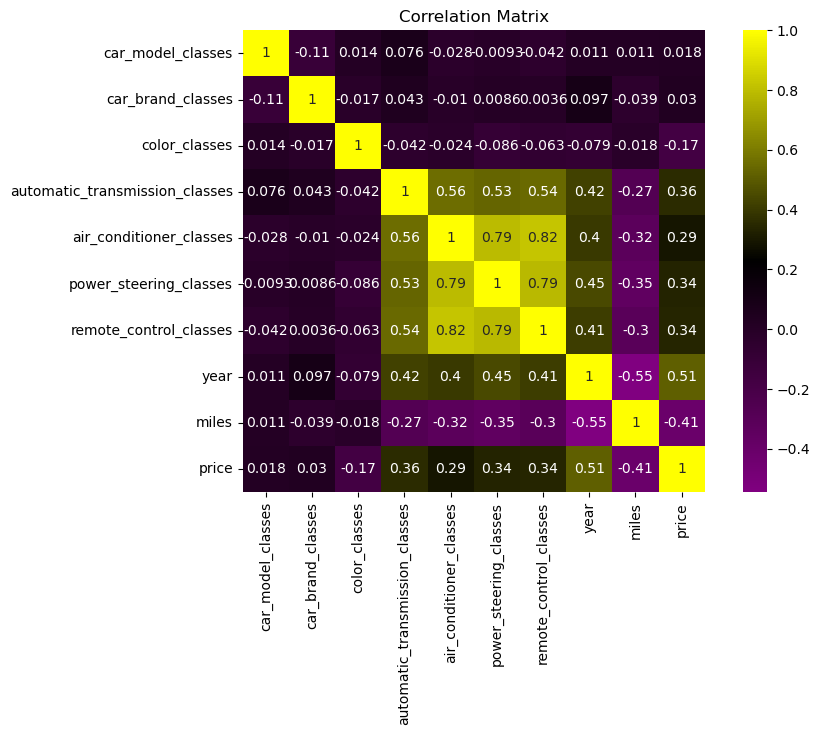

In [473]:
plt.figure(figsize=(10,6))
cmap = mcolors.LinearSegmentedColormap.from_list("", ["purple", "black", "yellow"])
sns.heatmap(correlation, annot=True, cmap=cmap, square=True)
plt.title('Correlation Matrix')
plt.show()

## Top 10 Car Brands Plot

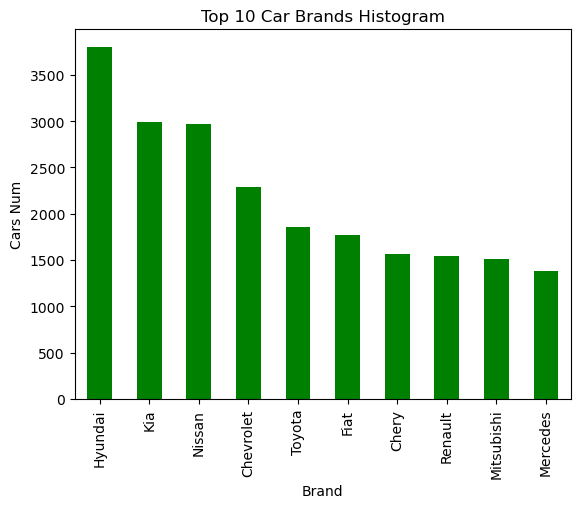

<Figure size 1000x600 with 0 Axes>

In [474]:
data['Make'].value_counts().head(10).plot(kind='bar', color='green')
plt.xlabel('Brand')
plt.ylabel('Cars Num')
plt.title("Top 10 Car Brands Histogram")
plt.xticks(rotation=90)
plt.figure(figsize=(10,6))
plt.tight_layout()
plt.show()

## Saving model

In [505]:
with open("car_prices_final.pk1", "wb") as f:
    pickle.dump(Regressor,f)